<a href="https://colab.research.google.com/github/iamhariprasad/shadowFox_AIML_Internship/blob/main/Boston_House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Import necessary libraries
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

1. Data Loading and Preprocessing

In [20]:
uploaded = files.upload()
df = pd.read_csv('HousingData.csv')

Saving HousingData.csv to HousingData (1).csv


In [21]:
df.fillna(df.mean(), inplace=True)

2. Exploratory Data Analysis (EDA)

In [22]:
corr_matrix = df.corr().round(2)

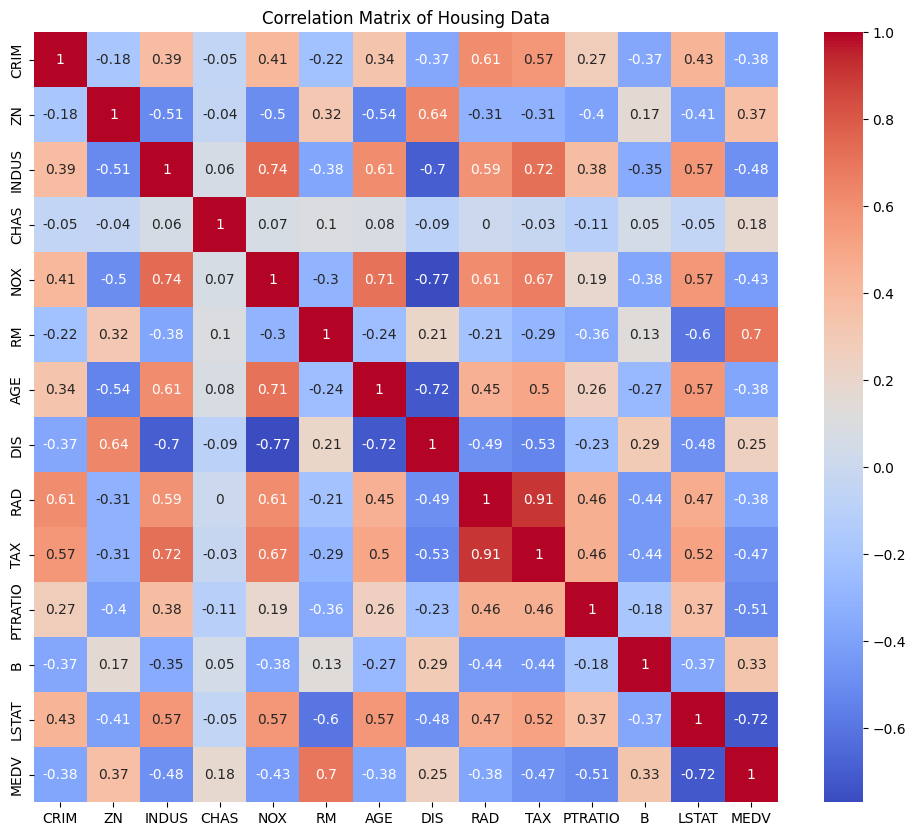

In [23]:
plt.figure(figsize=(12, 10))
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Housing Data')
plt.savefig('correlation_heatmap.png')

3. Feature Selection and Data Splitting

In [24]:
correlated_features = corr_matrix.index[abs(corr_matrix['MEDV']) > 0.5]

In [25]:
X = df[correlated_features.drop('MEDV')]
y = df['MEDV']


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Model Training

In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)

LinearRegression()

In [29]:
y_pred = model.predict(X_test)

In [30]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [31]:
print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2 Score): {r2}")

Model Evaluation Metrics:
Mean Squared Error (MSE): 27.533016964657918
Root Mean Squared Error (RMSE): 5.2471913405800175
R-squared (R2 Score): 0.6245520716630015


6. Visualization of Results

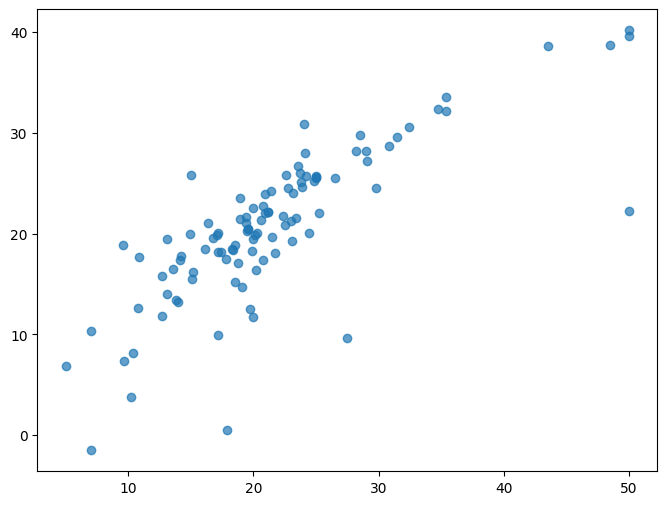

In [32]:

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)

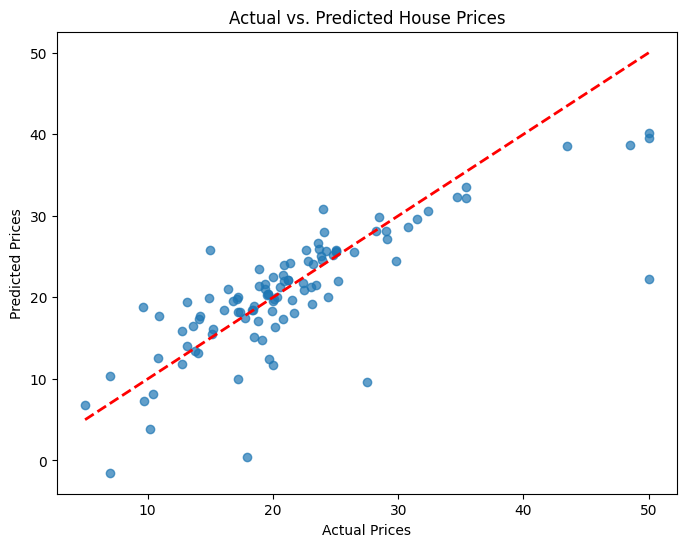

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')
plt.savefig('actual_vs_predicted.png')

In [34]:
residuals = y_test - y_pred

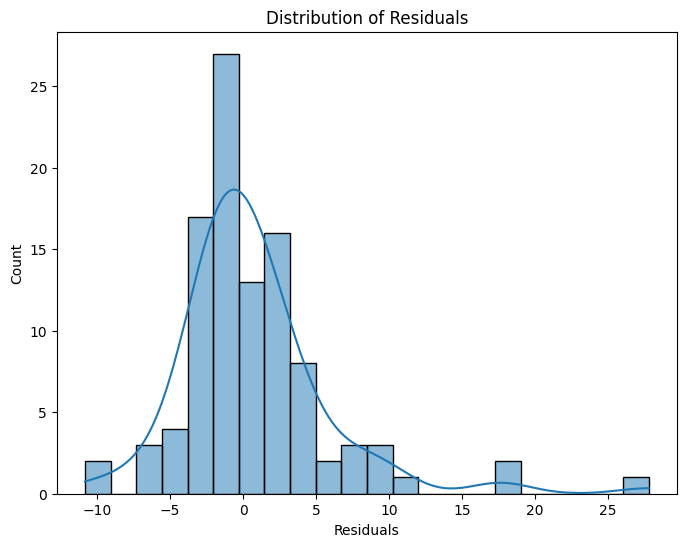

In [35]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.savefig('residuals_distribution.png')

7. Save Predictions

In [36]:
predictions_df = pd.DataFrame({'Actual_MEDV': y_test, 'Predicted_MEDV': y_pred})
predictions_df.to_csv('boston_housing_predictions.csv', index=False)

print("\nCode execution complete. Check the generated image files and 'boston_housing_predictions.csv'.")



Code execution complete. Check the generated image files and 'boston_housing_predictions.csv'.
